In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
#This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
#For more dataset information, please go through the following link,
#http://ai.stanford.edu/~amaas/data/sentiment/

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Python_google_colab/IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [14]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

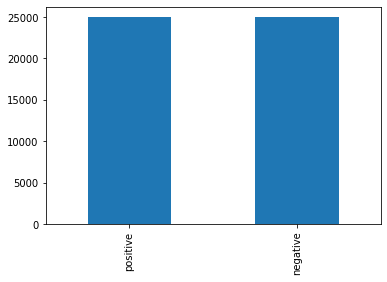

In [8]:
df['sentiment'].value_counts().plot.bar()

In [15]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review1 = re.sub('[^a-zA-Z]', ' ', df['review'][i])
    review1 = review1.lower()
    review1 = review1.split()
    
    review1 = [ps.stem(word) for word in review1 if not word in stopwords.words('english')]
    review1 = ' '.join(review1)
    corpus.append(review1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
corpus[0]

'one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch da

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 3000,ngram_range=(1,4))
X = cv.fit_transform(corpus).toarray()
y = df['sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred=mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))

[[6168 1109]
 [1243 6480]]
TRAIN DATA accuracy: 0.8498
TEST data accuracy:  0.8432


In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("MNV accuracy: " ,accuracy)

MNV accuracy:  0.8432


In [23]:

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()

clf_rf.fit(X_train,y_train)
rf_y_pred = clf_rf.predict(X_test)

print("Accuracy of train data: " , clf_rf.score(X_train,y_train))
print("Accuracy of test data: " , clf_rf.score(X_test,rf_y_pred))

from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_test, rf_y_pred)
print("Accuracy of RFC is:" , accuracy1)

Accuracy of train data:  1.0
Accuracy of test data:  1.0
Accuracy of RFC is: 0.8436666666666667


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(ngram_range= (1,5),max_features= 4000)
x_new = tf.fit_transform(corpus).toarray()

X_final = pd.DataFrame(x_new, columns= tf.get_feature_names())

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

from sklearn.naive_bayes import MultinomialNB
mb = MultinomialNB()
mb.fit(X_train, y_train)

y_pred_tfid = mb.predict(X_test)


from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred_tfid,y_test))

print("TRAIN DATA accuracy:", mb.score(X_train,y_train))

print("TEST data accuracy: ", mb.score(X_test,y_test))


from sklearn.metrics import accuracy_score
accuracy2 = accuracy_score(y_test, y_pred_tfid)
print("TFIDF MNV classifier accuracy: " ,accuracy2)

[[6193  964]
 [1218 6625]]
TRAIN DATA accuracy: 0.8602571428571428
TEST data accuracy:  0.8545333333333334
TFIDF MNV classifier accuracy:  0.8545333333333334


In [25]:
alpha = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
accc = []
for i in alpha:
  mb = MultinomialNB(alpha=i)
  mb.fit(X_train, y_train)
  y_pred_tfid = mb.predict(X_test)
  print("TRAIN DATA accuracy:", mb.score(X_train,y_train))
  print("TEST data accuracy: ", mb.score(X_test,y_test))
  accuracy2 = accuracy_score(y_test, y_pred_tfid)
  accc.append(accuracy2)
  print("TFIDF MNV classifier accuracy for value of alpha {} is: {}".format(i,accuracy2))




/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


TRAIN DATA accuracy: 0.8598571428571429
TEST data accuracy:  0.8544666666666667
TFIDF MNV classifier accuracy for value of alpha 0 is: 0.8544666666666667
TRAIN DATA accuracy: 0.8598285714285714
TEST data accuracy:  0.8542666666666666
TFIDF MNV classifier accuracy for value of alpha 0.1 is: 0.8542666666666666
TRAIN DATA accuracy: 0.8598285714285714
TEST data accuracy:  0.8543333333333333
TFIDF MNV classifier accuracy for value of alpha 0.2 is: 0.8543333333333333
TRAIN DATA accuracy: 0.8599142857142857
TEST data accuracy:  0.8544
TFIDF MNV classifier accuracy for value of alpha 0.3 is: 0.8544
TRAIN DATA accuracy: 0.8598857142857143
TEST data accuracy:  0.8544666666666667
TFIDF MNV classifier accuracy for value of alpha 0.4 is: 0.8544666666666667
TRAIN DATA accuracy: 0.8600285714285715
TEST data accuracy:  0.8543333333333333
TFIDF MNV classifier accuracy for value of alpha 0.5 is: 0.8543333333333333
TRAIN DATA accuracy: 0.8602
TEST data accuracy:  0.8542
TFIDF MNV classifier accuracy for 

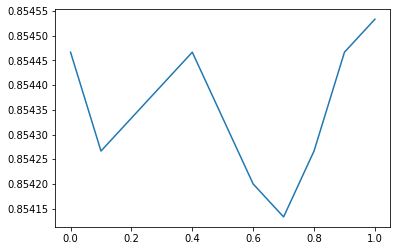

In [26]:
plt.plot(alpha,accc)